# Data Cleaning 

The goal of this notebook is to explore our college football datasets, identify outliers, and identify columns that have a high amoung of missing data. 



In [70]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt


In [71]:
pd.set_option('display.max_columns', None)

In [72]:
def plot_missingness(dataframe): 
    '''
    Plots the missingness values within each of the columns 
    '''
    # Identify missing values
    missing_values = dataframe.isnull().sum()
    #print("\n % of Values Missing:")
    missing_vals = pd.DataFrame(missing_values / len(dataframe)).reset_index()\
                                                        .rename({'index': 'column', 0: '% Missing'}, axis = 1)\
                                                        .sort_values(by = '% Missing', ascending = False)

    sns.barplot(data=missing_vals, x='% Missing', y ='column', color='skyblue')
        

## Games dataset 
In our ELO evaluation, we noticed 2020 is a particular outliar, looking at just Power 5 Confeerence teams and at the 12th games is when the elo rating was more complete. 


In here, we are going to be looking into: 
1. Other columns that are missing 
2. Some basic stats on the column values 


In [73]:
data = pd.read_csv('../data/games_manipulated.csv')
data.head()

/var/folders/wp/393dmtxd2jd8sj2z2tt7jpm40000gn/T/ipykernel_3988/713166745.py:1: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/games_manipulated.csv')


,Unnamed: 0,index,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag,game_that_season
0,0,1,400763593,2015,1,regular,2015-09-03T22:00:00.000Z,NaN,True,False,False,39184.00,3652.00,Bright House Networks Stadium,5.39,NaN,NaN,UCF,1,2116,2229,American Athletic,Conference USA,14.00,15.00,-1.00,"[7, 7, 0, 0]","[3, 0, 6, 6]",1626.00,1609.00,1321.00,1338.00,0,1
1,1,323,400764868,2015,3,regular,2015-09-19T22:00:00.000Z,False,True,False,False,36484.00,3652.00,Bright House Networks Stadium,5.03,NaN,NaN,UCF,1,2116,231,American Athletic,Southern,15.00,16.00,-1.00,"[7, 5, 3, 0]","[0, 7, 6, 3]",NaN,NaN,NaN,NaN,0,3
2,2,656,400764884,2015,6,regular,2015-10-10T19:45:00.000Z,NaN,True,False,True,26669.00,3652.00,Bright House Networks Stadium,3.01,NaN,NaN,UCF,1,2116,41,American Athletic,American Athletic,13.00,40.00,-27.00,"[3, 0, 0, 10]","[9, 14, 17, 0]",1460.00,1360.00,1262.00,1362.00,0,6
3,3,820,400764895,2015,8,regular,2015-10-24T16:00:00.000Z,NaN,True,False,True,28350.00,3652.00,Bright House Networks Stadium,2.10,NaN,NaN,UCF,1,2116,248,American Athletic,American Athletic,10.00,59.00,-49.00,"[7, 3, 0, 0]","[7, 17, 28, 7]",1356.00,1255.00,1712.00,1813.00,0,8
4,4,1276,400764911,2015,12,regular,2015-11-20T00:30:00.000Z,NaN,True,False,True,23734.00,3652.00,Bright House Networks Stadium,1.61,NaN,NaN,UCF,1,2116,151,American Athletic,American Athletic,7.00,44.00,-37.00,"[7, 0, 0, 0]","[14, 17, 13, 0]",1147.00,1082.00,1479.00,1544.00,0,11


In [74]:
# Filter
power_5_conf = ['SEC', 'ACC', 'Big Ten', 'Pac-12', 'Big 12']
power_5_games = data[data['team_conference'].isin(power_5_conf)]
final_game = power_5_games[power_5_games['game_that_season'] == 12]
final_game = final_game[final_game['season'] != 2020]


In [75]:
final_game.isna().sum()

Unnamed: 0                 0
index                      0
id                         0
season                     0
week                       0
season_type                0
start_date                 0
start_time_tbd           316
completed                  0
neutral_site               0
conference_game            0
attendance                 4
venue_id                   0
venue                      0
excitement_index           0
highlights               263
notes                    509
main_team                  0
home_game_flag             0
team_id                    0
opposing_team_id           0
team_conference            0
opposing_conference        0
points_for                 0
points_against             0
point_differential         0
team_line_scores           0
opposing_line_scores       0
team_pregame_elo           1
team_postgame_elo          1
opponent_pregame_elo       1
opponent_postgame_elo      1
win_flag                   0
game_that_season           0
dtype: int64

In [76]:
# Display basic information about the dataset
pd.set_option("display.float_format", lambda x: "{:.2f}".format(x))
final_game.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,511.00,9842.30,5840.20,56.00,4905.00,9154.00,14229.00,21587.00
index,511.00,2094.20,915.60,25.00,1438.00,1488.00,3524.00,3618.00
id,511.00,401112802.80,262839.60,400603912.00,400930436.50,401110864.00,401403956.50,401525906.00
season,511.00,2018.90,2.70,2015.00,2016.50,2019.00,2022.00,2023.00
week,511.00,13.10,1.00,1.00,13.00,13.00,13.00,14.00
attendance,507.00,59399.60,23418.20,15219.00,42737.50,55000.00,76472.00,112071.00
venue_id,511.00,3544.10,941.60,347.00,3636.00,3799.00,3910.00,6577.00
excitement_index,511.00,4.50,2.70,0.10,2.40,4.20,6.30,14.20
home_game_flag,511.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
team_id,511.00,524.70,856.90,2.00,96.00,183.00,265.00,2641.00


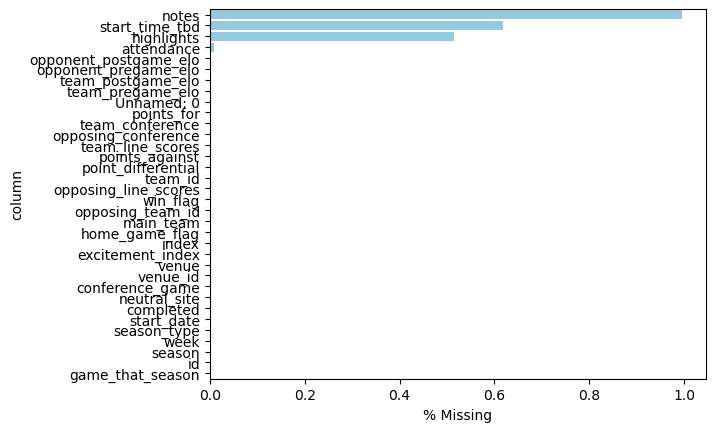

In [77]:
chart = plot_missingness(final_game)
chart

## Individual Recruiting Dataset

Created a no commitment flag to understand how many of the high school recruits committed. 

In [78]:
data = pd.read_csv('../data/recruits.csv')
data.head() 

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude
0,0,0,66928,3915192.00,HighSchool,2015,1.00,Trenton Thompson,Westover,Georgia,DT,74.00,313.00,5,1.00,Albany,GA,USA,31.58,-84.16
1,1,1,31860,NaN,HighSchool,2015,1.00,Trent Thompson,Westover,Georgia,DT,74.50,313.00,5,1.00,Albany,GA,USA,31.58,-84.16
2,2,2,31861,-1009710.00,HighSchool,2015,2.00,Martez Ivey,Apopka,Florida,OT,77.50,275.00,5,1.00,Apopka,FL,USA,28.68,-81.51
3,3,3,31862,3916922.00,HighSchool,2015,3.00,Byron Cowart,Armwood,Auburn,SDE,76.00,250.00,5,1.00,Seffner,FL,USA,28.00,-82.27
4,4,4,31863,3912545.00,HighSchool,2015,4.00,Iman Marshall,Long Beach Poly,USC,CB,73.00,190.00,5,1.00,Long Beach,CA,USA,33.77,-118.19


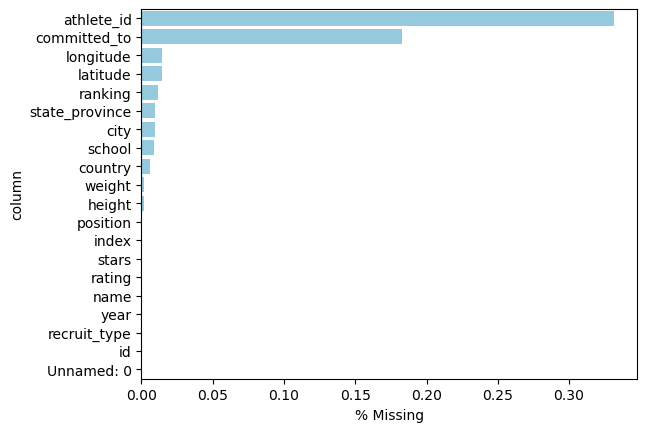

In [79]:
chart = plot_missingness(data)
chart

In [80]:
# Create flag for whether a play committed
# About 81% of the high school recruit data has not committed to a college 
data['committed_hasdata_flag'] = np.where(data['committed_to'].isna(), 0, 1)
data['committed_hasdata_flag'].mean()

0.8173119156679425

In [81]:
# We can see that a higher amount of player are not committed to a college 
data.groupby(by = 'year').agg({'committed_hasdata_flag': 'mean'})

,committed_hasdata_flag
year,
2015,0.85
2016,0.81
2017,0.78
2018,0.79
2019,0.75
2020,0.75
2021,0.92
2022,0.93
2023,0.95


In [82]:
data.head() 

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude,committed_hasdata_flag
0,0,0,66928,3915192.00,HighSchool,2015,1.00,Trenton Thompson,Westover,Georgia,DT,74.00,313.00,5,1.00,Albany,GA,USA,31.58,-84.16,1
1,1,1,31860,NaN,HighSchool,2015,1.00,Trent Thompson,Westover,Georgia,DT,74.50,313.00,5,1.00,Albany,GA,USA,31.58,-84.16,1
2,2,2,31861,-1009710.00,HighSchool,2015,2.00,Martez Ivey,Apopka,Florida,OT,77.50,275.00,5,1.00,Apopka,FL,USA,28.68,-81.51,1
3,3,3,31862,3916922.00,HighSchool,2015,3.00,Byron Cowart,Armwood,Auburn,SDE,76.00,250.00,5,1.00,Seffner,FL,USA,28.00,-82.27,1
4,4,4,31863,3912545.00,HighSchool,2015,4.00,Iman Marshall,Long Beach Poly,USC,CB,73.00,190.00,5,1.00,Long Beach,CA,USA,33.77,-118.19,1


In [83]:
a = data.groupby(by = 'year').agg({'committed_hasdata_flag': 'mean'}).reset_index()

alt.Chart(a).mark_line().encode(
    x = 'year:O',
    y = alt.Y('committed_hasdata_flag', title = '% of Records with Committment Data'))\
.properties(height = 300, width = 400, title = '% of Recruits with Committment by Year')

alt.Chart(...)

In [84]:
# Shows us that the players with a higher recuitment rating are more likely to commit in the dataset
data['rating_rounded'] = data['rating'].round(2)
scatter = data.groupby(by = ['year', 'rating_rounded']).agg({'committed_hasdata_flag': 'mean'}).reset_index()

alt.Chart(scatter).mark_circle().encode(
    x = alt.X('rating_rounded', scale=alt.Scale(domain=[.5, 1.0]), title = 'Recruiting Rating'), 
    y = alt.Y('committed_hasdata_flag', title = '% of Players With Committment Data')).facet(
    facet = 'year', columns = 4)

alt.FacetChart(...)

In [85]:
# Players with a higher recruiting rating but did not commit 
no_committed = data[data['committed_hasdata_flag'] == 0]

no_committed.sort_values(by = 'rating', ascending = False).head(5)

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude,committed_hasdata_flag,rating_rounded
24444,24444,2,71460,NaN,HighSchool,2021,3.00,J.T. Tuimoloau,Eastside Catholic,NaN,SDE,76.00,277.00,5,1.00,Sammamish,WA,USA,47.61,-122.04,0,1.00
20150,20150,15,61584,NaN,HighSchool,2020,16.00,Zachary Evans,North Shore,NaN,RB,71.00,200.00,5,0.99,Houston,TX,USA,29.76,-95.37,0,0.99
29472,29472,28,92330,NaN,HighSchool,2023,26.00,Samuel M'Pemba,IMG Academy,NaN,ATH,76.00,230.00,5,0.99,Saint Louis,MO,USA,38.63,-90.20,0,0.99
29473,29473,29,92356,NaN,HighSchool,2023,26.00,Jaquavious Russaw,Carver,NaN,EDGE,74.00,230.00,5,0.99,Troy,AL,USA,31.81,-85.97,0,0.99
29506,29506,62,93081,NaN,HighSchool,2023,55.00,DeAndre Moore Jr.,Los Alamitos,NaN,ATH,72.00,185.00,4,0.98,Los Alamitos,CA,USA,33.80,-118.08,0,0.98


As we can see below, there is a record for Zachary Evans and Zach Evans that seems to be the same person given that the other description details match including position, height, weight, and school. 

One thing to note about this is that we should be careful and try to group instances of this when leveraging this data. 

In [86]:
# Show where this data can be cleaned up
data[(data['school'] == 'North Shore') & (data['stars'] == 5)].head(30) 

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude,committed_hasdata_flag,rating_rounded
20150,20150,15,61584,NaN,HighSchool,2020,16.00,Zachary Evans,North Shore,NaN,RB,71.00,200.00,5,0.99,Houston,TX,USA,29.76,-95.37,0,0.99
20151,20151,16,74906,4685035.00,HighSchool,2020,16.00,Zach Evans,North Shore,TCU,RB,71.00,200.00,5,0.99,Houston,TX,USA,29.76,-95.37,1,0.99
27203,27203,24,90126,4685388.00,HighSchool,2022,23.00,Denver Harris,North Shore,Texas A&M,CB,73.00,180.00,5,0.99,Houston,TX,USA,29.76,-95.37,1,0.99


## Team Talent Composite Ratings 

Every school in this dataset has an overall talent score.

In [87]:
data = pd.read_csv('../data/team_talent.csv')

data.head()

,year,school,talent
0,2015,Alabama,981.90
1,2015,USC,926.71
2,2015,Ohio State,907.32
3,2015,Florida State,889.92
4,2015,LSU,889.37


In [88]:
# No Missing values
data.isna().sum()

year      0
school    0
talent    0
dtype: int64

In [89]:
# Talent Score ranged from 0 to 1016 
data['talent'].describe()

count   2010.00
mean     348.40
std      285.56
min        0.00
25%       58.88
50%      351.21
75%      593.04
max     1016.79
Name: talent, dtype: float64

## Draft datasets

In [90]:
data = pd.read_csv('../data/draft.csv')

data.head()

,Unnamed: 0,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,wAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28_level_1,draft_year
0,0,1,1,KAN,Eric Fisher,T,22,2021,0,2,8,62,56,132,0,0,0,0,0,0,0,0,1,-3,1,NaN,NaN,NaN,Central Michigan,NaN,2013
1,1,1,2,JAX,Luke Joeckel,T,21,2017,0,0,3,21,16,50,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,Texas A&M,College Stats,2013
2,2,1,3,MIA,Dion Jordan,DE,23,2020,0,0,0,9,3,63,0,0,0,0,0,0,0,0,0,0,0,82,NaN,13.5,Oregon,College Stats,2013
3,3,1,4,PHI,Lane Johnson,T,23,2023,2,5,9,79,79,143,0,0,0,0,0,0,0,0,1,5,1,NaN,NaN,NaN,Oklahoma,College Stats,2013
4,4,1,5,DET,Ezekiel Ansah,DE,24,2020,0,1,5,39,37,93,0,0,0,0,0,0,0,0,0,0,0,174,NaN,50.5,BYU,College Stats,2013


In [91]:
# Important fields (Name, draft_year, and Pick) are populated
data.isna().sum()

Unnamed: 0                0
Rnd                       0
Pick                      0
Tm                        0
Player                    0
Pos                       0
Age                       4
To                      214
AP1                       0
PB                        0
St                        0
wAV                     214
DrAV                    361
G                       214
Cmp                     214
Att                     214
Yds                     214
TD                      214
Int                     214
Att.1                   214
Yds.1                   214
TD.1                    214
Rec                     214
Yds.2                   214
TD.2                    214
Solo                    953
Int.1                  2269
Sk                     2018
College/Univ              2
Unnamed: 28_level_1     309
draft_year                0
dtype: int64

## Team Attribute dataset 

In [92]:
data = pd.read_csv('../data/teams.csv')

data.head()

,Unnamed: 0,id,school,conference,division,color,logos
0,0,2005,Air Force,Mountain West,Mountain,#004a7b,http://a.espncdn.com/i/teamlogos/ncaa/500/2005...
1,1,2006,Akron,Mid-American,East,#00285e,http://a.espncdn.com/i/teamlogos/ncaa/500/2006...
2,2,333,Alabama,SEC,West,#690014,http://a.espncdn.com/i/teamlogos/ncaa/500/333.png
3,3,2026,Appalachian State,Sun Belt,East,#000000,http://a.espncdn.com/i/teamlogos/ncaa/500/2026...
4,4,12,Arizona,Pac-12,NaN,#002449,http://a.espncdn.com/i/teamlogos/ncaa/500/12.png


In [93]:
data.isna().sum()

Unnamed: 0     0
id             0
school         0
conference     0
division      53
color          0
logos          0
dtype: int64

In [94]:
data = pd.read_csv('../data/roster.csv')

data.head()

,Unnamed: 0,id,first_name,last_name,team,height,weight,jersey,year,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids
0,0,13223,Justin,Johnson,Fresno State,73.00,201.00,25.00,2015,DB,Gardena,CA,USA,33.90,-118.31,6037.00,[23334]
1,1,29649,Jamaal,Jackson,Delaware State,NaN,NaN,NaN,2015,RB,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,100009,Johnny,Jackson,Arizona,NaN,NaN,NaN,2015,WR,San Diego,CA,USA,32.72,-117.16,6073.00,[]
3,3,106327,Jason,Johnson,Western Kentucky,72.00,NaN,5.00,2015,DB,Pahokee,FL,USA,26.82,-80.67,12099.00,[34236]
4,4,108118,Nicholas,Peoples,Grambling,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [95]:
# % missing values
data.isna().sum() / len(data)

Unnamed: 0         0.00
id                 0.00
first_name         0.00
last_name          0.00
team               0.00
height             0.05
weight             0.09
jersey             0.06
year               0.00
position           0.03
home_city          0.05
home_state         0.06
home_country       0.05
home_latitude      0.07
home_longitude     0.07
home_county_fips   0.07
recruit_ids        0.00
dtype: float64

### Roster Data

In [96]:
df_roster = pd.read_csv('../data/roster.csv',low_memory=False)

In [97]:
roster_df = df_roster.rename(columns={'team': 'school'})
# roster_df.head() 

In [98]:
roster_df.head() 

,Unnamed: 0,id,first_name,last_name,school,height,weight,jersey,year,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids
0,0,13223,Justin,Johnson,Fresno State,73.00,201.00,25.00,2015,DB,Gardena,CA,USA,33.90,-118.31,6037.00,[23334]
1,1,29649,Jamaal,Jackson,Delaware State,NaN,NaN,NaN,2015,RB,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,100009,Johnny,Jackson,Arizona,NaN,NaN,NaN,2015,WR,San Diego,CA,USA,32.72,-117.16,6073.00,[]
3,3,106327,Jason,Johnson,Western Kentucky,72.00,NaN,5.00,2015,DB,Pahokee,FL,USA,26.82,-80.67,12099.00,[34236]
4,4,108118,Nicholas,Peoples,Grambling,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [99]:
power_five_colleges = final_game['main_team'].unique() 
print(power_five_colleges)

power_five_rosters = roster_df[roster_df['school'].isin(power_five_colleges)]
print(f'\n{power_five_rosters.head().to_markdown() }')

['UCF' 'South Carolina' 'Wake Forest' 'Georgia Tech' 'Vanderbilt' 'Utah'
 'Minnesota' 'Arizona' 'Syracuse' 'Oregon State' 'Kansas' 'Maryland'
 'Rutgers' 'Iowa' 'Ole Miss' 'Northwestern' 'Georgia' 'Clemson'
 'Pittsburgh' 'Boston College' 'Illinois' 'Washington State' 'Nebraska'
 'Auburn' 'UCLA' 'Arkansas' 'Texas Tech' 'Tennessee' 'Indiana' 'Missouri'
 'California' 'Miami' 'NC State' 'Texas A&M' 'Kentucky' 'Oklahoma'
 'Kansas State' 'Florida' 'West Virginia' 'Iowa State' 'Oregon' 'Houston'
 'Alabama' 'Cincinnati' 'Florida State' 'USC' 'Virginia Tech' 'Louisville'
 'Purdue' 'Michigan' 'Penn State' 'Wisconsin' 'Washington' 'Colorado'
 'Virginia' 'Ohio State' 'TCU' 'North Carolina' 'Duke' 'Baylor'
 'Oklahoma State' 'Michigan State' 'Texas' 'Mississippi State' 'BYU'
 'Stanford' 'Arizona State' 'LSU']

|    |   Unnamed: 0 |     id | first_name   | last_name   | school        |   height |   weight |   jersey |   year | position   | home_city   | home_state   | home_country   |   home_latitude 

In [100]:
roster_size_df = pd.DataFrame(power_five_rosters.groupby(['year','school'])['id'].nunique()).reset_index().rename(columns={'id': 'roster_size'}) 
roster_size_df.head() 

,year,school,roster_size
0,2015,Alabama,71
1,2015,Arizona,67
2,2015,Arizona State,66
3,2015,Arkansas,80
4,2015,Auburn,75


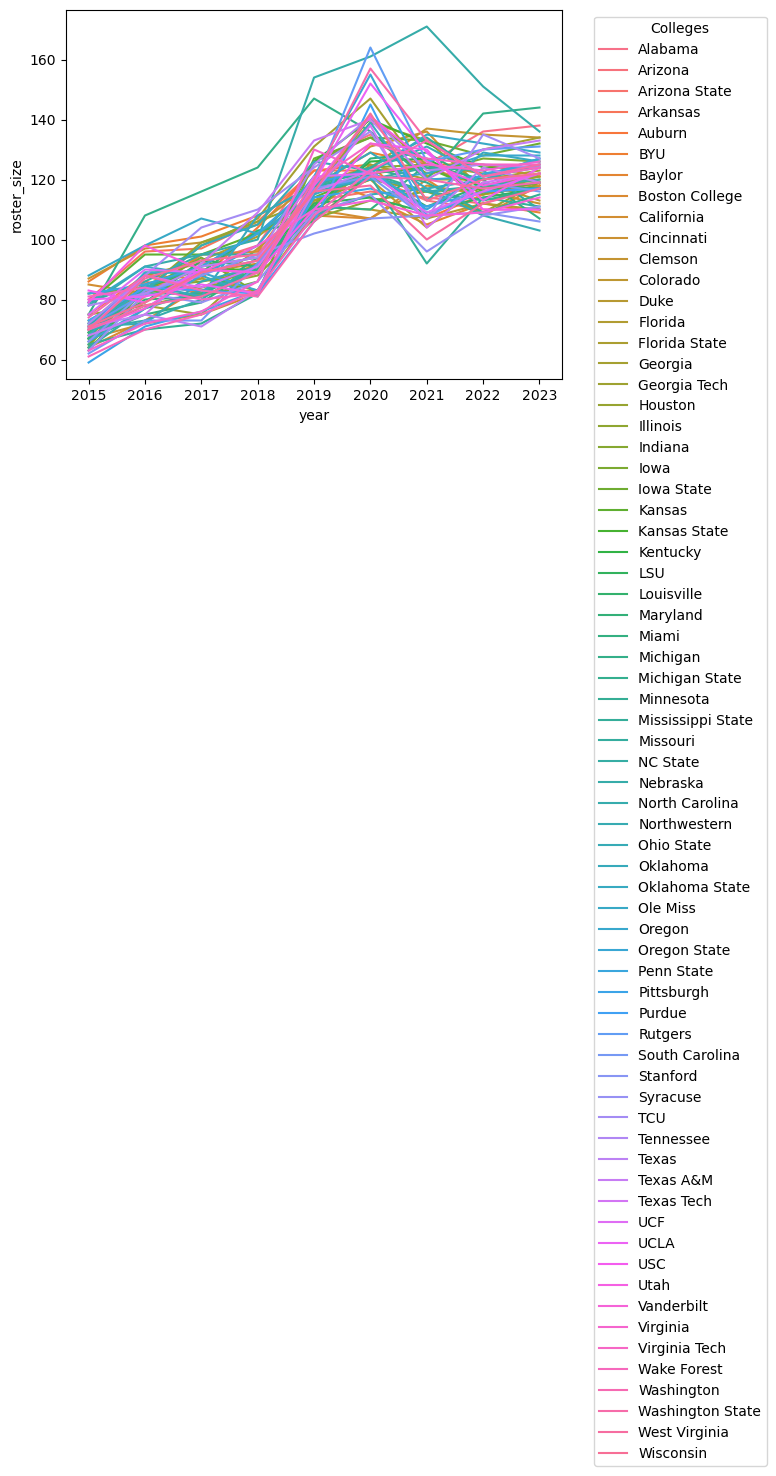

In [101]:
# Super interesting, over the past 8 years the number of players on the roster has increased 
sns.lineplot(data=roster_size_df, x='year', y='roster_size', hue='school')
plt.legend(title='Colleges', bbox_to_anchor=(1.05, 1), loc='upper left')
